# Statistics within Categories

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\Eddie\\Downloads\\UNZIP_FOR_NOTEBOOKS_FINAL\\05-Seaborn\\dm_office_sales.csv")


In [3]:
df.head()

,division,level of education,training level,work experience,salary,sales
0,printers,some college,2,6,91684,372302
1,printers,associate's degree,2,10,119679,495660
2,peripherals,high school,0,9,82045,320453
3,office supplies,associate's degree,2,5,92949,377148
4,office supplies,high school,1,5,71280,312802


In [4]:
df['division'].value_counts()

office supplies      252
printers             250
peripherals          243
computer hardware    159
computer software     96
Name: division, dtype: int64

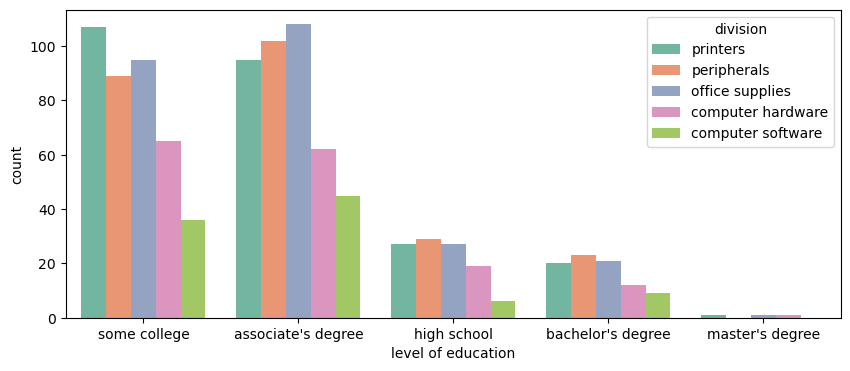

In [17]:
plt.figure(figsize = (10,4))

ax = sns.countplot(data= df, x = 'level of education', hue = 'division', palette = 'Set2')
sns.move_legend(ax,  'upper right')

In [8]:
df['level of education'].value_counts()

associate's degree    412
some college          392
high school           108
bachelor's degree      85
master's degree         3
Name: level of education, dtype: int64

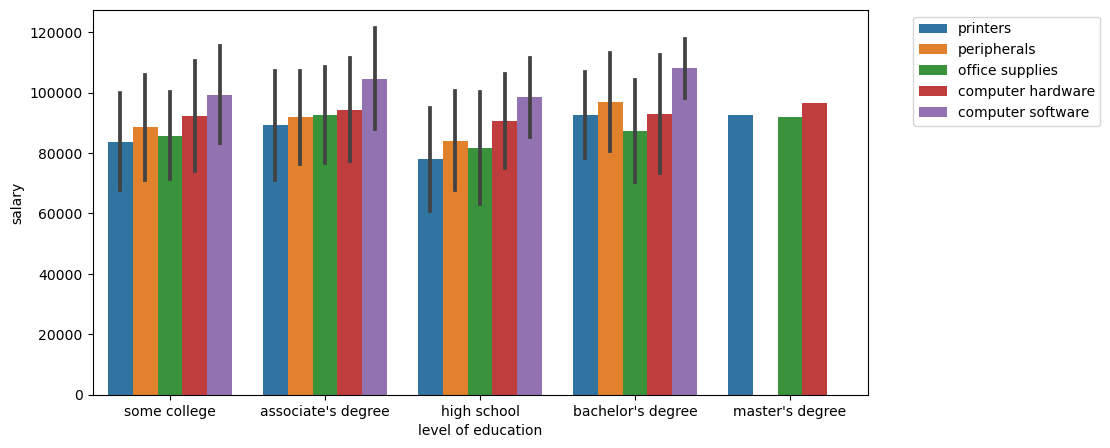

In [36]:
plt.figure(figsize= (10,5))
sns.barplot(data = df, x = 'level of education', y = 'salary', estimator = np.mean, ci = 'sd', hue = 'division')
plt.legend(bbox_to_anchor = (1.05,1))
# estimator is what determines what aggregation method to perform on salary
# the default is mean but here it is specified anyway

# ci - confidence interval is set to sd - standard deviation
# black line represents the standard deviation of the salaries based on their level of education

# in this case masters values don't have deviation bars because there are only 3 total masters educated employees in this 
# data frame -- e.g. there is no standard deviation for a single point of data 

# Distribution within Categories

In [37]:
df = pd.read_csv("C:\\Users\\Eddie\\Downloads\\UNZIP_FOR_NOTEBOOKS_FINAL\\05-Seaborn\\StudentsPerformance.csv")

In [38]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


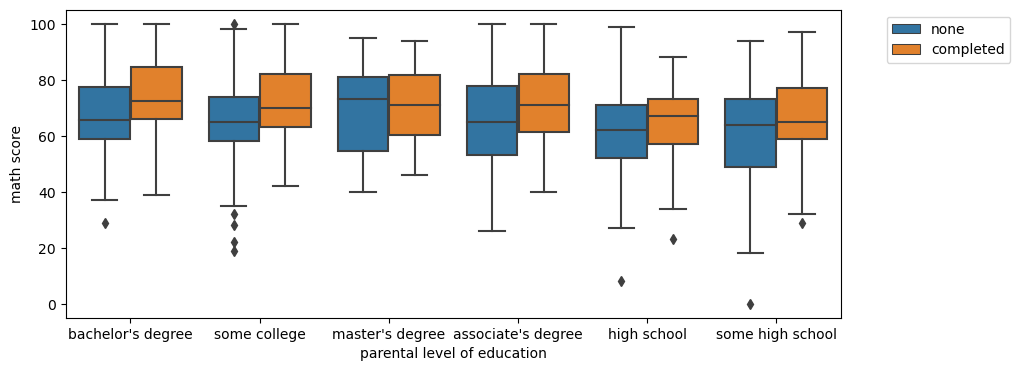

In [70]:
plt.figure(figsize = (10,4))
sns.boxplot(data = df, y = 'math score', x = 'parental level of education', hue = 'test preparation course')
plt.legend(bbox_to_anchor = (1.05,1))

In [69]:
df.groupby(['test preparation course','parental level of education']).describe().transpose()

test preparation course              completed                                \
parental level of education associate's degree bachelor's degree high school   
math score    count                  82.000000         46.000000   56.000000   
              mean                   71.829268         73.282609   65.000000   
              std                    14.347370         15.252924   12.999301   
              min                    40.000000         39.000000   23.000000   
              25%                    61.250000         66.000000   57.000000   
              50%                    71.000000         72.500000   67.000000   
              75%                    82.000000         84.500000   73.250000   
              max                   100.000000        100.000000   88.000000   
reading score count                  82.000000         46.000000   56.000000   
              mean                   76.170732         76.739130   67.839286   
              std                    12.562736         14.100331   13.447239   
              min                    43.000000         42.000000   41.000000   
              25%                    68.250000         66.500000   57.750000   
              50%                    77.000000         75.000000   68.500000   
              75%                    85.000000         85.500000   79.000000   
              max                   100.000000        100.000000   99.000000   
writing score count                  82.000000         46.000000   56.000000   
              mean                   76.817073         78.695652   68.053571   
              std                    12.681403         13.283021   13.191484   
              min                    44.000000         38.000000   36.000000   
              25%                    68.000000         70.250000   59.500000   
              50%                    79.000000         79.500000   68.000000   
              75%                    86.750000         87.750000   78.000000   
              max                    99.000000        100.000000  100.000000   

test preparation course                                                    \
parental level of education master's degree some college some high school   
math score    count               20.000000    77.000000        77.000000   
              mean                70.600000    71.454545        66.701299   
              std                 14.615781    13.899589        14.583755   
              min                 46.000000    42.000000        29.000000   
              25%                 60.250000    63.000000        59.000000   
              50%                 71.000000    70.000000        65.000000   
              75%                 81.750000    82.000000        77.000000   
              max                 94.000000   100.000000        97.000000   
reading score count               20.000000    77.000000        77.000000   
              mean                78.250000    75.987013        70.948052   
              std                 14.927456    12.068329        14.137386   
              min                 42.000000    47.000000        37.000000   
              25%                 69.500000    71.000000        61.000000   
              50%                 79.000000    78.000000        71.000000   
              75%                 89.500000    84.000000        83.000000   
              max                 99.000000    97.000000       100.000000   
writing score count               20.000000    77.000000        77.000000   
              mean                80.100000    76.519481        70.363636   
              std                 13.606887    11.566297        13.480892   
              min                 46.000000    51.000000        40.000000   
              25%                 73.500000    70.000000        60.000000   
              50%                 79.500000    77.000000        72.000000   
              75%                 90.250000    85.000000        79.0000

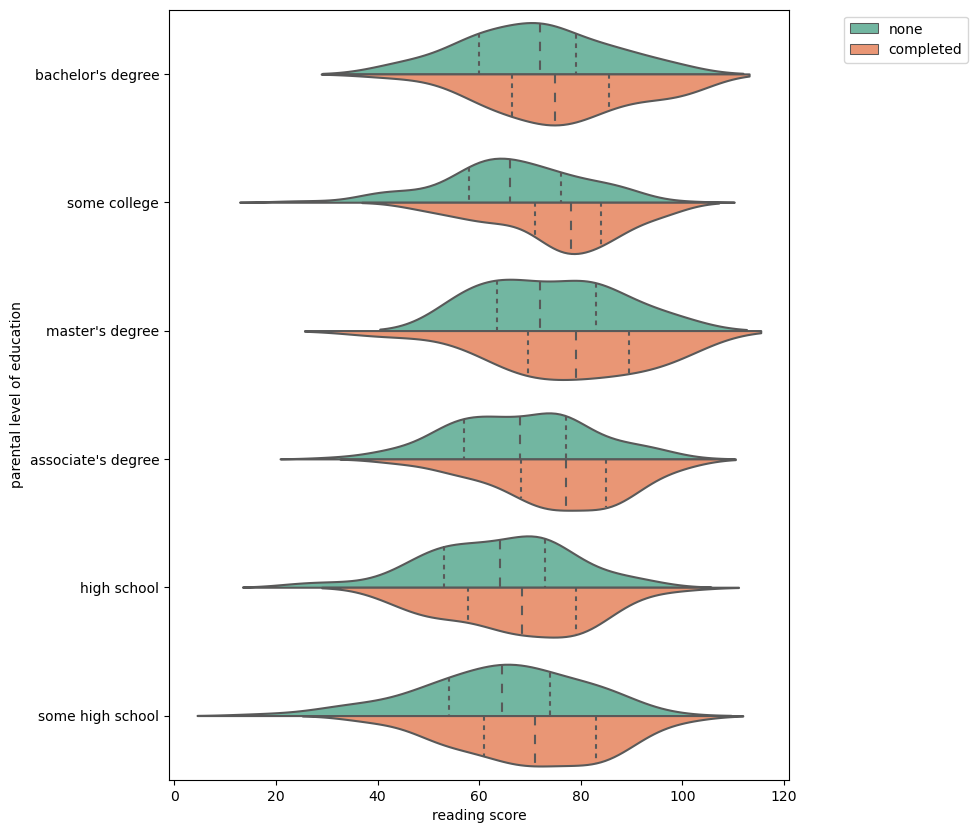

In [91]:
plt.figure(figsize = (8,10))
sns.violinplot(data = df, x = 'reading score', y = 'parental level of education', 
               hue = 'test preparation course', palette = "Set2", split =True, inner = 'quartile')
plt.legend(bbox_to_anchor = (1.30,1))

# Split combines the two separate violin plots of completed/none into one
# inner = None removes quartile measurer 
# inner = 'quartile' marks the 25/50/75% marks
# inner = 'sticks' marks all the instances within the violin plot

<AxesSubplot:xlabel='reading score', ylabel='parental level of education'>

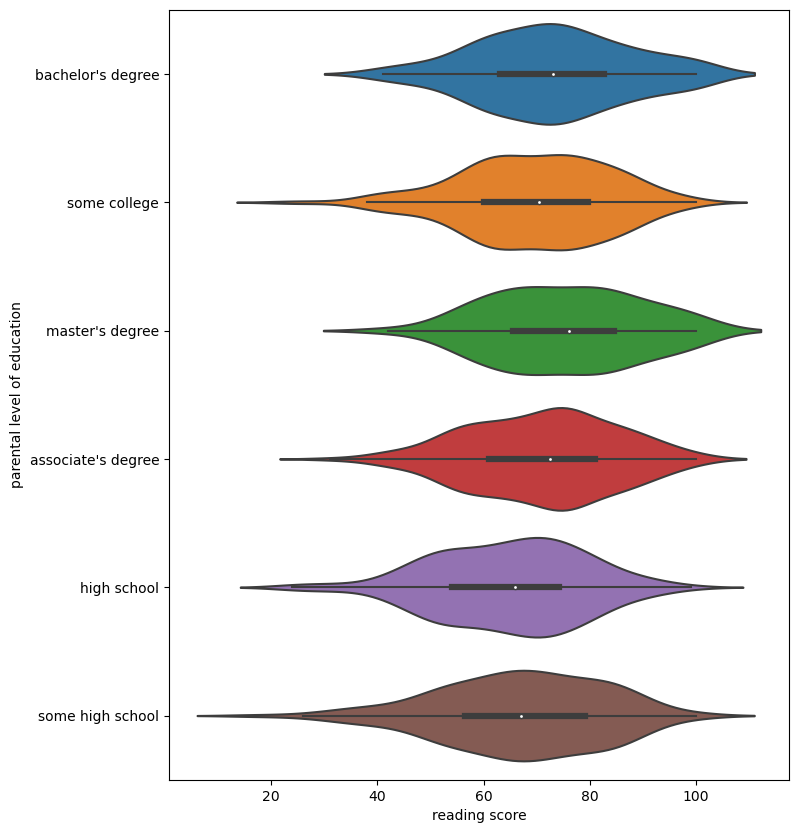

In [97]:
plt.figure(figsize = (8,10))
sns.violinplot(data = df, x = 'reading score', y = 'parental level of education',  )



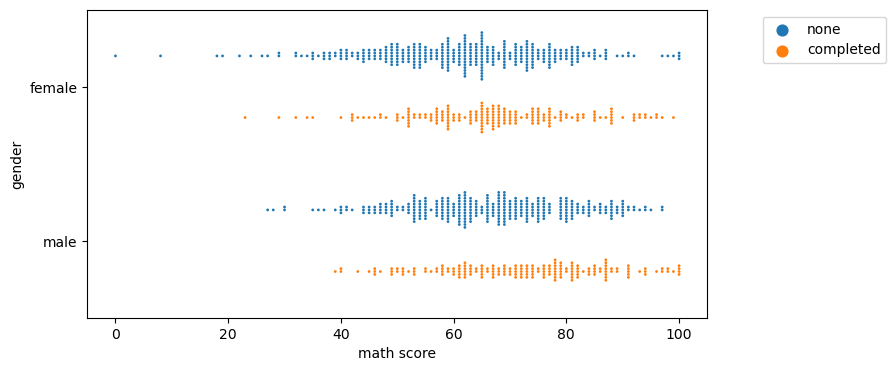

In [109]:
plt.figure(figsize = (8,4))
sns.swarmplot(data = df, x = 'math score', size = 2, y = 'gender', hue = 'test preparation course', dodge = True)

plt.legend(bbox_to_anchor = (1.30,1))

# without dodge = True graph is essentially unreadable 